<a href="https://colab.research.google.com/github/vidya100804/DEEP-LEARNING-EXPERIMENTS/blob/main/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
maxlen = 200
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [4]:
model=Sequential()
model.add(Dense(128, activation='relu', input_shape=(maxlen,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4948 - loss: 372.8789 - val_accuracy: 0.4978 - val_loss: 1.0585
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4997 - loss: 13.4937 - val_accuracy: 0.4997 - val_loss: 0.7076
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5011 - loss: 3.3226 - val_accuracy: 0.5040 - val_loss: 0.6983
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4987 - loss: 1.7124 - val_accuracy: 0.5008 - val_loss: 0.6939
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4995 - loss: 1.4698 - val_accuracy: 0.4979 - val_loss: 0.6960
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5021 - loss: 0.9875 - val_accuracy: 0.4986 - val_loss: 0.6954
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4981 - loss: 1.0145 - val_accuracy: 0.5012 - val_loss: 0.6936
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5037 - loss: 1.0238 - val_accuracy:

In [7]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 49.90%


In [8]:
from sklearn.metrics import classification_report
y_pred = (model.predict(X_test) > 0.5).astype("int32")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [9]:
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

              precision    recall  f1-score   support

    Negative       0.50      0.99      0.66     12500
    Positive       0.46      0.01      0.02     12500

    accuracy                           0.50     25000
   macro avg       0.48      0.50      0.34     25000
weighted avg       0.48      0.50      0.34     25000



In [10]:
cm = confusion_matrix(y_test, y_pred)

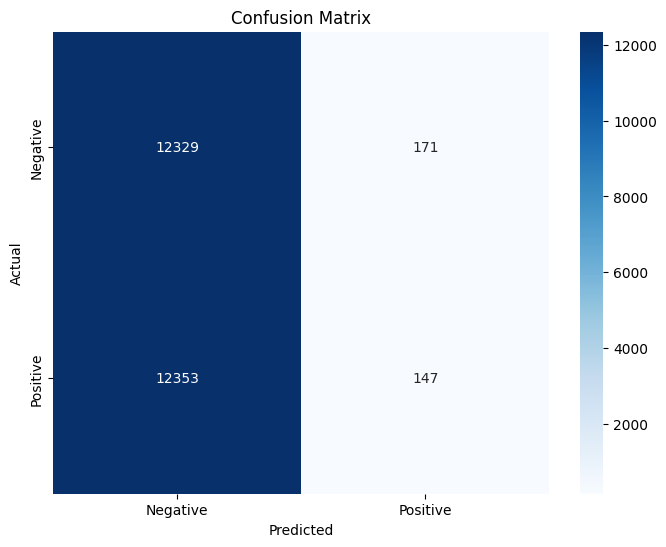

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"],
yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()